# 데이터 표현과 특성 공학

- 범주형 특성 호근 이산형 특성이라고 하는데, 보통 숫자값으로 표현되어있지 않음
- 어떤 특성 안에는 중간값이 없고 카테고리 사이에서도 순서가 없어 표현하지 못할 수도 있음
- 데이터를 어떻게 표현하는지에 따라 성능이 달라질 것임

ex) 제품 브랜드, 색상, 판매분류 등등. 

특정 애플리케이션에 가장 적합한 데이터 표현을 찾는 것이 "특성 공학"*Feature engineering*

In [33]:
%matplotlib inline
import os
import pandas as pd
import mglearn
import numpy as np
import matplotlib.pyplot as plt

## 4.1 범주형 변수

In [6]:
data1 = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
data1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


수입이 5만달러를 초과하는지 아닌지에 대한 로지스틱 회귀 분류기를 적용하고 싶은데 workclass, education, sex, occupation은 범주형 특성이므로 이를 바꿔서 적용해야 함

### 4.1.1 원-핫-인코딩 (가변수)

- one-hot-encoding 또는 dummy variable이라고도 불림
- 범주형 변수를 0 또는 1값을 가진 하나 이상의 새로운 특성으로 바꾼 것임.
- 가령 4개의 특성이 있을 때 한 특성은 1이고 나머지는 0으로 표현되는 것

In [3]:
data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])

data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]

display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [7]:
# 범주형 데이터 문자열 확인하기

print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [9]:
print("Original Features:\n", list(data.columns),'\n')

data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성: \n", list(data_dummies.columns))

Original Features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성: 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 

범주형 변수만 바뀐 모습을 확인할 수 있다.

In [11]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [19]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


훈련 데이터,테스트 데이터를 포함해둔 상태에서 더미로 표현함.

- 더미변환을 데이터를 미리 구분지어놓고 하게 되면 각각 제대로 변환되었는지 일일이 확인해야하는 수고로움이 있기도 하고
- 만약에 훈련데이터와 테스트데이터 상에서 특성 갯수가 다르다면(훈련에는 3개, 테스트에는 4개라면) 학습모델을 적용할수가 없음

### 4.1.2 숫자로 표현된 범주형 특성

- get dummies는 숫자 특성은 모두 연속형이라고 생각하기 때문에 숫자로 쓰여진 연속형은 OneHotEncoder를 사용해야 함

In [27]:
demo_df = pd.DataFrame({"숫자 특성": [0,1,2,1], "범주형 특성":['양말', '여우','양말','상자']})
display(demo_df)

,범주형 특성,숫자 특성
0,양말,0
1,여우,1
2,양말,2
3,상자,1


In [28]:
display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [29]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns = ['숫자 특성', '범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


## 4.2 구간 분할, 이산화 그리고 선형 모델, 트리 모델

- 데이터 특성이나 모델에 따라서 데이터 표현방법이 다름

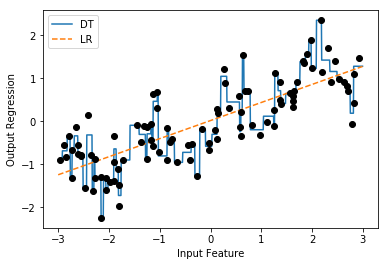

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="DT")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="LR")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Output Regression")
plt.xlabel("Input Feature")
plt.legend(loc="best")

In [37]:
bins = np.linspace(-3, 3, 11)
print("Interval : {}".format(bins))

Interval : [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [38]:
which_bin  = np.digitize(X, bins=bins)
print("\n데이터 포인트:\n", X[:5])
print("\n데이터 포인트의 소속 구간:\n", which_bin[:5])


데이터 포인트:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

데이터 포인트의 소속 구간:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [41]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [42]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


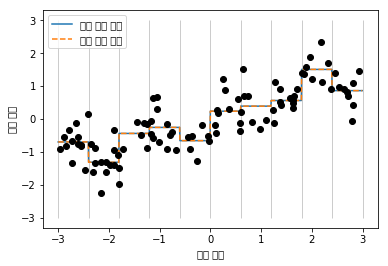

In [43]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")

선형 회귀 모델과 디시전 트리가 같은 예측 결과를 나타냄.

선형 회귀는 유연해졌지만 디시전트리는 덜 유연해졌음. 구간으로 나누면서 선형 회귀가 이득을 많이 얻게 되었음

용량이 매우 크고 고차원적인 모델에 대해서 선형모델을 적용할 시에는 구간 분할이 모델 성능을 높이는 데 좋은 방법이 될 수 있음